In [52]:
# Importing libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn import linear_model, svm, preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
# Reading the datasets
data1 = pd.read_csv('wheat-2013-supervised.csv')
data2 = pd.read_csv('wheat-2014-supervised.csv')

In [3]:
# Merging two datasets
merged = data1.append(data2, ignore_index=True)
merged = merged[["CountyName","State","Latitude","Longitude","Date","apparentTemperatureMax","apparentTemperatureMin","cloudCover","dewPoint","humidity","precipIntensity","precipIntensityMax","precipProbability","precipAccumulation","precipTypeIsRain","precipTypeIsSnow","precipTypeIsOther",	"pressure",	"temperatureMax","temperatureMin","visibility",	"windBearing","windSpeed","NDVI","DayInSeason","Yield" ]]
merged.to_csv('merged.csv', index=None, header=True)

In [4]:
mg = pd.read_csv('merged.csv')
mg = mg[["Latitude","Longitude","apparentTemperatureMax","apparentTemperatureMin","cloudCover","dewPoint","humidity","precipIntensity","precipIntensityMax","precipProbability","precipAccumulation","precipTypeIsRain","precipTypeIsSnow","precipTypeIsOther",	"pressure",	"temperatureMax","temperatureMin","visibility",	"windBearing","windSpeed","NDVI","DayInSeason","Yield" ]]
mg.dropna(inplace=True)
mg = abs(mg)

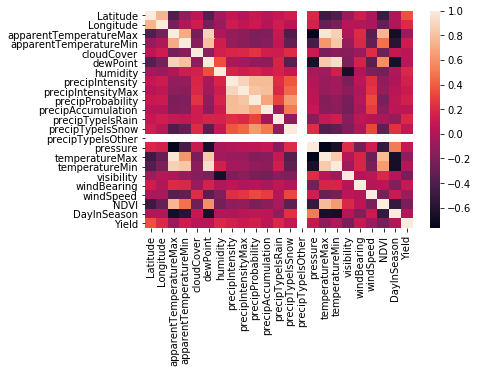

In [37]:
# plt.matshow(mg.corr())

# calculate the correlation matrix
corr = mg.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [25]:
X = mg.iloc[:,0:22]  #independent columns
y = mg.iloc[:,-23]    #target column i.e price range
y=y.astype('int')


In [7]:
# Determining the best features from the data
# Applying SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns


In [8]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features


                     Specs          Score
18             windBearing  584431.000407
3   apparentTemperatureMin  490523.148008
5                 dewPoint  388245.325492
2   apparentTemperatureMax  379951.701286
16          temperatureMin  372298.742126
15          temperatureMax  290953.292597
0                 Latitude  233754.438546
1                Longitude   97060.962816
20                    NDVI   35048.564785
19               windSpeed   25328.273283


c:\python27\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.47897876 0.09980957 0.0293743  0.03023236 0.03014479 0.03073437
 0.0282732  0.00842512 0.00827309 0.00915986 0.00182215 0.00285161
 0.00156185 0.         0.03354577 0.02985115 0.03064849 0.02483537
 0.03294126 0.03072755 0.02811002 0.02969938]


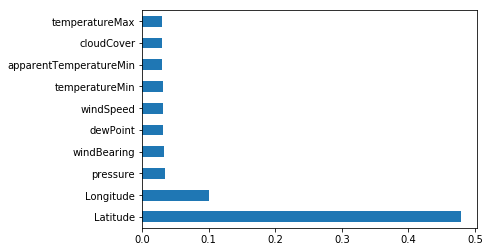

In [9]:
# Verify the results of aboove method by using feature importance method
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [6]:
# mg = mg[["Latitude","Longitude","apparentTemperatureMax","apparentTemperatureMin","dewPoint",	"temperatureMax","temperatureMin",	"windBearing","windSpeed","NDVI","Yield" ]]
mg = mg[1:10000]
X = np.array(mg.drop(["Yield"],1))
y = np.asarray(mg['Yield'],dtype= np.int64)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Applying Decision Tree Classifier with prunning
DT_C = DecisionTreeClassifier(max_depth=5, min_samples_split=2,max_leaf_nodes = 45, 
                             min_samples_leaf = 6 , random_state=1)
DT_C.fit(X_train, y_train)
accuracy = DT_C.score(X_test, y_test)
print(accuracy)

0.4096666666666667


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
DT_R = DecisionTreeRegressor(max_depth=2, min_samples_split=2,max_leaf_nodes = 6, 
                             min_samples_leaf = 3 , random_state=2)
DT_R.fit(X_train, y_train)
accuracy = DT_R.score(X_test, y_test)
print(accuracy)

0.7076679943981528


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lm = LogisticRegression(C=10.0, random_state=0)
model = lm.fit(X_train, y_train)
# cross_val_score(model, X_test, y_test)
model.score(X_test, y_test)


c:\python27\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python27\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.195

In [13]:
# Code for Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# create regressor object 
rand_forest = RandomForestRegressor(n_estimators = 100, random_state = 0,max_depth=2,min_samples_leaf = 3 ) 
# fit the regressor with x and y data 
rand_forest.fit(X_train, y_train) 
accuracy = rand_forest.score(X_test, y_test)
print(accuracy)

0.6376521371984896


In [30]:
# Combining Decison Tree Classsifier and Random Forest Classifier which yields a good accuracy.
from sklearn.ensemble import VotingClassifier
rand_forest = RandomForestClassifier(n_estimators=50, random_state=1)
est_Ensemble = VotingClassifier(estimators=[('Random Forest', rand_forest), ('DT_Classifier', DT_C)],
                        voting='soft',
                        weights=[1, 1])
est_Ensemble.fit(X_train,y_train)
score_Ensemble=est_Ensemble.score(X_test,y_test)
# scores = cross_val_score(est_Ensemble, X, y, scoring='accuracy', cv=5)
print(score_Ensemble)

0.8403333333333334


In [ ]:
#Code for SVM
#clf = svm.SVR(kernel="poly")
#clf.fit(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = svm.SVC(kernel='linear')
# cross_val_score(clf, X, y)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

In [16]:
# Applying Knn from sklearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
knn.fit(X, y)
accuracy = knn.score(X_test, y_test)
print(accuracy)

0.8236666666666667
